<a href="https://colab.research.google.com/github/yootina/Deep/blob/master/231219_Data_Analysis_Example_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preprocessing

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/★ 3조 (펜타코어)/데이터/data/2021상권데이터/2021_행정동별_점포매출_유동인구_통합.csv', encoding='cp949', index_col=0)
df1

,행정동_코드,당월_매출_금액,업종구분_기타,업종구분_미용,업종구분_쇼핑,업종구분_오락,업종구분_음식점,업종구분_제과_카페,업종구분_호프,총_유동인구_수,20_30유동인구 비율,2030매출비율_기타,2030매출비율_미용,2030매출비율_쇼핑,2030매출비율_오락,2030매출비율_음식점,2030매출비율_제과_카페,2030매출비율_호프
분기,,,,,,,,,,,,,,,,,,
1,11110515,16279289573,7957270622,151892026,661176442,0,4726687444,2672728479,109534560,2242741.0,0.286198,0.286819,0.411206,0.197685,0.000000,0.520960,0.563569,0.667124
1,11110530,51046545373,8051636700,508702777,4686058163,881808575,28598084267,7288258992,1031995899,4160962.0,0.335312,0.326803,0.386879,0.350078,0.472955,0.354206,0.434287,0.516301
1,11110540,20775867634,748282665,0,7931923765,0,7901046060,4051835729,142779415,341878.0,0.332885,0.233961,0.000000,0.637019,0.000000,0.497991,0.463850,0.838784
1,11110550,2805749974,653598448,77289390,175244182,0,1148271975,733364518,17981461,1066838.0,0.230987,0.428948,0.241511,0.455697,0.000000,0.313628,0.508579,0.669007
1,11110560,6459931554,2329370775,152511405,81348024,17883485,2807989540,958236770,112591555,518211.0,0.216589,0.147299,0.027382,0.693809,0.048298,0.197497,0.286801,0.119143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,11740640,24165044757,9547675159,189227730,2828996206,1006240313,8924049859,1230388434,438467056,4070147.0,0.282801,0.237067,0.306807,0.229304,0.410025,0.333990,0.438859,0.243442
4,11740650,24711611732,9801557983,557325473,1136973165,836471217,10091841826,1178134133,1109307935,7156185.0,0.303431,0.294717,0.378606,0.222530,0.568746,0.509921,0.489722,0.581454
4,11740660,43103894439,18011611117,905328582,8190056435,567331857,11913187871,2601350490,915028087,5728212.0,0.285928,0.216755,0.433834,0.197805,0.389968,0.349311,0.448366,0.347920


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 1 to 4
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정동_코드          1596 non-null   int64  
 1   당월_매출_금액        1596 non-null   int64  
 2   업종구분_기타         1596 non-null   int64  
 3   업종구분_미용         1596 non-null   int64  
 4   업종구분_쇼핑         1596 non-null   int64  
 5   업종구분_오락         1596 non-null   int64  
 6   업종구분_음식점        1596 non-null   int64  
 7   업종구분_제과_카페      1596 non-null   int64  
 8   업종구분_호프         1596 non-null   int64  
 9   총_유동인구_수        1596 non-null   float64
 10  20_30유동인구 비율    1596 non-null   float64
 11  2030매출비율_기타     1596 non-null   float64
 12  2030매출비율_미용     1596 non-null   float64
 13  2030매출비율_쇼핑     1596 non-null   float64
 14  2030매출비율_오락     1596 non-null   float64
 15  2030매출비율_음식점    1596 non-null   float64
 16  2030매출비율_제과_카페  1596 non-null   float64
 17  2030매출비율_호프     1596 non-null   floa

In [ ]:
df1.nunique()

행정동_코드             399
당월_매출_금액          1596
업종구분_기타           1593
업종구분_미용           1585
업종구분_쇼핑           1568
업종구분_오락           1481
업종구분_음식점          1596
업종구분_제과_카페        1574
업종구분_호프           1456
총_유동인구_수          1596
20_30유동인구 비율      1596
2030매출비율_기타       1593
2030매출비율_미용       1585
2030매출비율_쇼핑       1528
2030매출비율_오락       1472
2030매출비율_음식점      1593
2030매출비율_제과_카페    1577
2030매출비율_호프       1439
dtype: int64

In [ ]:
# 데이터프레임(df)에서 각 열의 고유한 값의 개수를 계산합니다.
unique_value_counts = df1.nunique()

# 고유한 값의 개수가 1 이하인 열을 필터링합니다.
# Over18, StandardHours
# 이때, True 또는 False로 구성된 불리언 시리즈가 생성됩니다.
columns_to_drop = unique_value_counts[unique_value_counts <= 1]

# 고유한 값의 개수가 1 이하인 열의 인덱스를 리스트로 추출합니다.
columns_to_drop_indices = columns_to_drop.index.to_list()

# 추출한 열의 인덱스를 사용하여 해당 열들을 데이터프레임에서 제거합니다.
# axis=1은 열 방향을 의미합니다.
# inplace=True를 사용하여 원본 데이터프레임을 수정합니다.
df1.drop(columns=columns_to_drop_indices, axis=1, inplace=True)

In [ ]:
df1.drop('EmployeeNumber', axis=1, inplace=True)

In [ ]:
df1['Attrition'] = df1['Attrition'].eq('Yes')

In [ ]:
df1['당월_매출_금액'].mean()

33336618578.852757

In [ ]:
df_ = df1.copy()

In [ ]:
df_.columns

Index(['행정동_코드', '당월_매출_금액', '업종구분_기타', '업종구분_미용', '업종구분_쇼핑', '업종구분_오락',
       '업종구분_음식점', '업종구분_제과_카페', '업종구분_호프', '총_유동인구_수', '20_30유동인구 비율',
       '2030매출비율_기타', '2030매출비율_미용', '2030매출비율_쇼핑', '2030매출비율_오락',
       '2030매출비율_음식점', '2030매출비율_제과_카페', '2030매출비율_호프'],
      dtype='object')

In [ ]:
df = pd.get_dummies(
    df1,
    columns=df1.dtypes[df1.dtypes == 'object'].index,
    drop_first=True)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

### Correlation

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/s

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fun

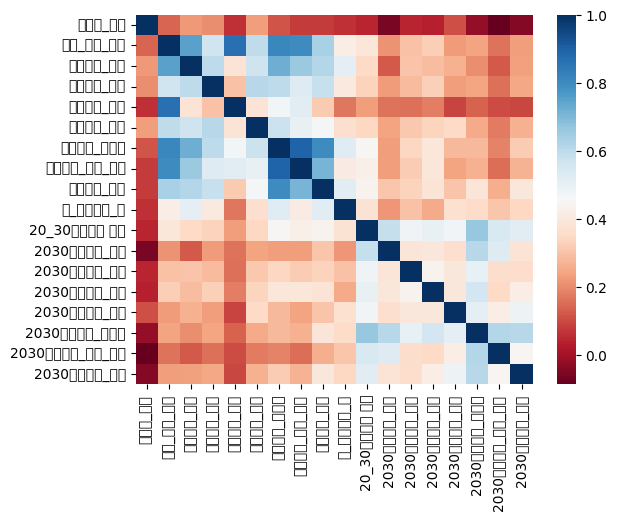

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = scaled.corr()

sns.heatmap(corr, cmap='RdBu')

In [ ]:
corr.당월_매출_금액.sort_values(ascending=False)[1:]

업종구분_쇼핑           0.864812
업종구분_음식점          0.811893
업종구분_제과_카페        0.797980
업종구분_기타           0.751781
업종구분_호프           0.632329
업종구분_오락           0.594777
업종구분_미용           0.563781
총_유동인구_수          0.415990
20_30유동인구 비율      0.388929
2030매출비율_쇼핑       0.324552
2030매출비율_미용       0.296698
2030매출비율_음식점      0.238793
2030매출비율_호프       0.230364
2030매출비율_오락       0.225609
2030매출비율_기타       0.214197
2030매출비율_제과_카페    0.161093
행정동_코드            0.139641
Name: 당월_매출_금액, dtype: float64

In [ ]:
abs_attrition_corr = corr.Attrition.apply(abs).sort_values(ascending=False)[1:]
abs_attrition_corr.head(10)

OverTime_Yes                    0.246118
MaritalStatus_Single            0.175419
TotalWorkingYears               0.171063
JobLevel                        0.169105
YearsInCurrentRole              0.160545
MonthlyIncome                   0.159840
Age                             0.159205
JobRole_Sales Representative    0.157234
YearsWithCurrManager            0.156199
StockOptionLevel                0.137145
Name: Attrition, dtype: float64

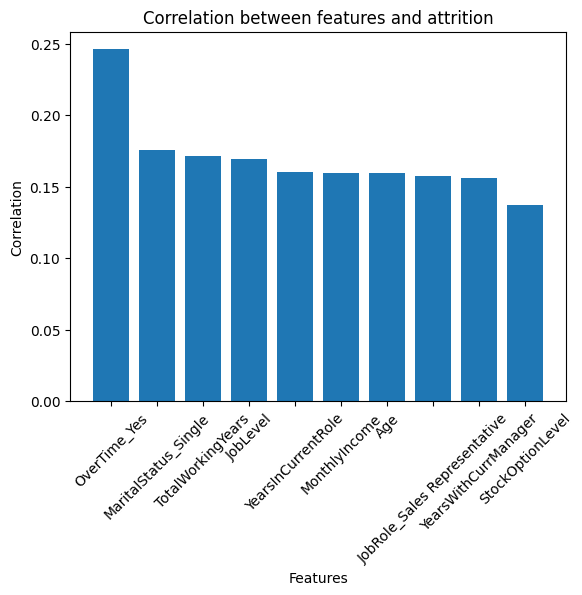

In [ ]:
abs_attrition_corr_top10 = abs_attrition_corr.head(10)
plt.bar(abs_attrition_corr_top10.index,
        abs_attrition_corr_top10.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between features and attrition')
plt.xticks(rotation=45)
plt.show()

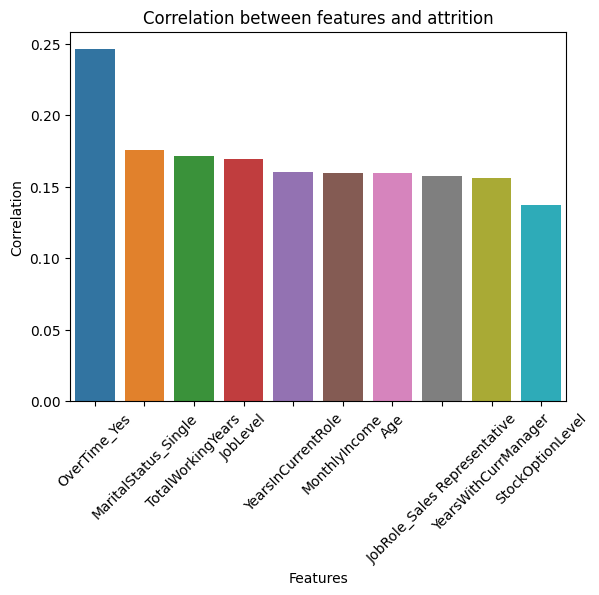

In [ ]:
sns.barplot(x=abs_attrition_corr_top10.index,
            y=abs_attrition_corr_top10.values)
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation between features and attrition')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

fig = px.bar(abs_attrition_corr_top10,
             x=abs_attrition_corr_top10.index,
             y=abs_attrition_corr_top10.values)
fig.show()

In [ ]:
X = scaled.drop('당월_매출_금액', axis=1)
y = scaled.당월_매출_금액
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Feautre Importances

In [ ]:
# RandomForest -> 트리모델의 경우에는 무슨 열(데이터)가 분류에 영향을 끼치는지를 확인.
from sklearn.ensemble import RandomForestClassifier
# rfc 자체를 예측모델로 안쓰더라도 중요한 feature 찾기 위해 탐색용으로도 사용 가능.
# Classifier : 분류할 때
# Regressor : 회귀(수치형 변수 예측)할 때

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# predict, 평가 X

ValueError: ignored

In [ ]:
ft = pd.Series(rf.feature_importances_,
          index=rf.feature_names_in_)\
    .sort_values(ascending=False)
ft

MonthlyIncome                        0.077769
Age                                  0.061215
DailyRate                            0.054553
TotalWorkingYears                    0.051881
MonthlyRate                          0.050001
OverTime_Yes                         0.047914
HourlyRate                           0.044667
YearsAtCompany                       0.042506
DistanceFromHome                     0.040401
PercentSalaryHike                    0.034742
NumCompaniesWorked                   0.034211
EnvironmentSatisfaction              0.030776
StockOptionLevel                     0.028089
WorkLifeBalance                      0.026954
JobInvolvement                       0.026495
JobSatisfaction                      0.025013
YearsWithCurrManager                 0.024913
YearsInCurrentRole                   0.024247
TrainingTimesLastYear                0.023614
JobLevel                             0.023563
YearsSinceLastPromotion              0.022521
RelationshipSatisfaction          

In [ ]:
len(scaled.columns)

45

In [ ]:
X = df1.drop('', axis=1)
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

### AutoML

In [ ]:
!pip install flaml[notebook] -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00


In [ ]:
!pip install catboost -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.8 MB/s eta 0:00:00


In [ ]:
# FLAML 라이브러리에서 AutoML을 가져옵니다.
from flaml import AutoML

# 최적의 추정기(estimator) 목록을 저장할 빈 리스트를 생성합니다.
best_estimators = []

# AutoML을 실행할 추정기(estimator) 목록을 정의합니다.
# https://microsoft.github.io/FLAML/docs/Use-Cases/Task-Oriented-AutoML#estimator
estimators = ['xgboost', 'lgbm', 'catboost', 'xgb_limitdepth', 'kneighbor']

# 각 추정기에 대한 AutoML을 실행합니다.
for e in estimators:
    print(e)

    # AutoML 객체를 생성하고, 사용할 추정기(estimator)를 지정합니다.
    automl = AutoML(estimator_list=[e])

    # AutoML 모델을 학습합니다.
    automl.fit(
        X_train=X_train_,  # 학습 데이터 (X_train_)를 지정합니다.
        y_train=y_train,    # 학습 레이블 (y_train)를 지정합니다.
        task='classification',  # 분류(classification) 작업을 수행합니다.
        time_budget=60,       # 총 시간 예산을 1분으로 설정합니다.
        verbose=False          # 자세한 로그를 출력하지 않습니다.
    )

    # 최적의 하이퍼파라미터 구성을 출력합니다.
    print('Best hyperparameter config:', automl.best_config)

    # 검증 데이터에 대한 최적의 정확도를 출력합니다.
    print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))

    # 테스트 데이터에 대한 정확도를 계산하고 출력합니다.
    acc = accuracy_score(automl.model.predict(X_test_), y_test)
    print('Test accuracy : {0:.4g} '.format(acc))

    # 최적의 추정기와 모델을 저장합니다.
    best_estimators.append((e, automl.model))

# 최적의 추정기 목록을 반환합니다.
best_estimators

xgboost
Best hyperparameter config: {'n_estimators': 166, 'max_leaves': 33, 'min_child_weight': 10.197799264188433, 'learning_rate': 0.027669982437157674, 'subsample': 0.893379582429785, 'colsample_bylevel': 1.0, 'colsample_bytree': 0.8701745757057389, 'reg_alpha': 0.021756625193894385, 'reg_lambda': 3.2453650164626975}
Best accuracy on validation data: 0.8279
Test accuracy : 0.8614 
lgbm
Best hyperparameter config: {'n_estimators': 432, 'num_leaves': 18, 'min_child_samples': 49, 'learning_rate': 0.04067856721258896, 'log_max_bin': 10, 'colsample_bytree': 0.6395255711853273, 'reg_alpha': 0.0018633999877243066, 'reg_lambda': 0.0009765625}
Best accuracy on validation data: 0.8399
Test accuracy : 0.8505 
catboost
Best hyperparameter config: {'early_stopping_rounds': 16, 'learning_rate': 0.06264522148395278, 'n_estimators': 38}
Best accuracy on validation data: 0.8399
Test accuracy : 0.8587 
xgb_limitdepth
Best hyperparameter config: {'n_estimators': 124, 'max_depth': 5, 'min_child_weight'

[('xgboost', <flaml.automl.model.XGBoostSklearnEstimator at 0x7cd0966334f0>),
 ('lgbm', <flaml.automl.model.LGBMEstimator at 0x7cd096617c10>),
 ('catboost', <flaml.automl.model.CatBoostEstimator at 0x7cd094bc81c0>),
 ('xgb_limitdepth',
  <flaml.automl.model.XGBoostLimitDepthEstimator at 0x7cd094fdf640>),
 ('kneighbor', <flaml.automl.model.KNeighborsEstimator at 0x7cd07e368100>)]

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들을 사용합니다.
# `voting`은 하드 보팅(hard voting)을 지정합니다.
voting_clf_hard = VotingClassifier(
    estimators=best_estimators, voting='hard')

# VotingClassifier를 학습합니다.
voting_clf_hard.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_hard.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Hard) Test accuracy : {0:.4g} '.format(acc))

Voting (Hard) Test accuracy : 0.8533 


In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들을 사용합니다.
# `voting`은 소프트 보팅(soft voting)을 지정합니다.
voting_clf_soft = VotingClassifier(
    estimators=best_estimators, voting='soft')

# VotingClassifier를 학습합니다.
voting_clf_soft.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_soft.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Soft) Test accuracy : {0:.4g} '.format(acc))

Voting (Soft) Test accuracy : 0.8505 


In [ ]:
# VotingClassifier를 생성합니다.
# `estimators`에는 이전에 학습한 최적의 추정기와 모델들 중에서 일부를 선택합니다.
# 선택한 추정기들은 best_estimators 리스트의 인덱스를 사용하여 지정합니다.
# `weights`를 통해 각 모델의 가중치를 지정합니다. (1, 2, 1)
# `voting`은 소프트 보팅(soft voting)을 지정합니다.
voting_clf_soft = VotingClassifier(
    estimators=best_estimators[0:2]+best_estimators[3:4],
    weights=[1, 2, 1], voting='soft')

# VotingClassifier를 학습합니다.
voting_clf_soft.fit(X_train, y_train)

# VotingClassifier 모델을 사용하여 테스트 데이터에 대한 정확도를 계산합니다.
acc = accuracy_score(voting_clf_soft.predict(X_test), y_test)

# 테스트 데이터에 대한 정확도를 출력합니다.
print('Voting (Soft) Test accuracy : {0:.4g} '.format(acc))

Voting (Soft) Test accuracy : 0.856 


In [ ]:
!pip install mlxtend -q

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(voting_clf_soft, 'voting.pkl')

['voting.pkl']

In [ ]:
# !wget https://github.com/BigDeepData/2312_example/raw/main/model/voting.pkl
# !wget https://github.com/BigDeepData/2312_example/raw/main/model/scaler.pkl

voting_model = joblib.load('voting.pkl')
scaler = joblib.load('scaler.pkl')

### Input

In [ ]:
for col in df_.drop('Attrition', axis=1).columns:
    # if col in df_input:
    #     continue
    print(col)
    print(sorted(df_.loc[:, col].unique()))
    print(min(df_.loc[:, col].unique()))
    print(max(df_.loc[:, col].unique()))

Age
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
18
60
BusinessTravel
['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Non-Travel
Travel_Rarely
DailyRate
[102, 103, 104, 105, 106, 107, 109, 111, 115, 116, 117, 118, 119, 120, 121, 124, 125, 128, 129, 130, 131, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 167, 168, 170, 172, 174, 176, 177, 179, 180, 181, 182, 185, 188, 189, 192, 193, 194, 195, 196, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 210, 211, 213, 216, 217, 218, 219, 224, 228, 230, 231, 232, 234, 237, 238, 240, 241, 243, 244, 247, 248, 249, 251, 252, 253, 254, 256, 258, 261, 263, 264, 265, 266, 267, 268, 269, 271, 277, 279, 280, 282, 285, 286, 287, 288, 289, 290, 294, 296, 299, 300, 301, 302, 303, 304, 305, 306, 307, 309, 310, 311, 313, 314, 316, 317, 318, 319, 322

In [ ]:
Age = 60 #@param{type: "slider", min: 18, max: 60}
BusinessTravel = 'Travel_Frequently' #@param['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
DailyRate = 102 #@param{type: "slider", min: 102, max: 1499}
Department = 'Sales' #@param['Human Resources', 'Research & Development', 'Sales']
DistanceFromHome = 29 #@param{type: "slider", min: 1, max: 29}
Education = 1 #@param{type: "slider", min: 1, max: 5}
EducationField = 'Technical Degree' #@param['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
EnvironmentSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
Gender = 'Male' #@param['Female', 'Male']
HourlyRate = 30 #@param{type: "slider", min: 30, max: 100}
JobInvolvement = 1 #@param{type: "slider", min: 1, max: 4}
JobLevel = 1 #@param{type: "slider", min: 1, max: 5}
JobRole = 'Human Resources' #@param['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
JobSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
MaritalStatus = 'Single' #@param['Divorced', 'Married', 'Single']
MonthlyIncome = 1000 #@param{type: "slider", min: 1000, max: 20000}
MonthlyRate = 30000 #@param{type: "slider", min: 2000, max: 30000}
NumCompaniesWorked = 9 #@param{type: "slider", min: 0, max: 9}
OverTime = 'Yes' #@param['No', 'Yes']
PercentSalaryHike = 10 #@param{type: "slider", min: 10, max: 30}
PerformanceRating = 4 #@param{type: "slider", min: 1, max: 4}
RelationshipSatisfaction = 1 #@param{type: "slider", min: 1, max: 4}
StockOptionLevel = 0 #@param{type: "slider", min: 0, max: 3}
TotalWorkingYears = 0 #@param{type: "slider", min: 0, max: 40}
TrainingTimesLastYear = 0 #@param{type: "slider", min: 0, max: 6}
WorkLifeBalance = 1 #@param{type: "slider", min: 1, max: 4}
YearsAtCompany = 0 #@param{type: "slider", min: 0, max: 40}
YearsInCurrentRole = 0 #@param{type: "slider", min: 0, max: 20}
YearsSinceLastPromotion = 0 #@param{type: "slider", min: 0, max: 20}
YearsWithCurrManager = 0 #@param{type: "slider", min: 0, max: 20}

custom_input = pd.DataFrame([dict(
    Age=Age,
    BusinessTravel=BusinessTravel,
    DailyRate=DailyRate,
    Department=Department,
    DistanceFromHome=DistanceFromHome,
    Education=Education,
    EducationField=EducationField,
    EnvironmentSatisfaction=EnvironmentSatisfaction,
    Gender=Gender,
    HourlyRate=HourlyRate,
    JobInvolvement=JobInvolvement,
    JobLevel=JobLevel,
    JobRole=JobRole,
    JobSatisfaction=JobSatisfaction,
    MaritalStatus=MaritalStatus,
    MonthlyIncome=MonthlyIncome,
    MonthlyRate=MonthlyRate,
    NumCompaniesWorked=NumCompaniesWorked,
    OverTime=OverTime,
    PercentSalaryHike=PercentSalaryHike,
    PerformanceRating=PerformanceRating,
    RelationshipSatisfaction=RelationshipSatisfaction,
    StockOptionLevel=StockOptionLevel,
    TotalWorkingYears=TotalWorkingYears,
    TrainingTimesLastYear=TrainingTimesLastYear,
    WorkLifeBalance=WorkLifeBalance,
    YearsAtCompany=YearsAtCompany,
    YearsInCurrentRole=YearsInCurrentRole,
    YearsSinceLastPromotion=YearsSinceLastPromotion,
    YearsWithCurrManager=YearsWithCurrManager,
)])

custom_input

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,60,Travel_Frequently,102,Sales,29,1,Technical Degree,1,Male,30,...,4,1,0,0,0,1,0,0,0,0


In [ ]:
X_input = pd.get_dummies(
    pd.concat([df_.drop('Attrition', axis=1),custom_input],
              ignore_index=True),
    columns=df_.dtypes[df_.dtypes == 'object'].index,
    drop_first=True).iloc[[-1]]
X_input = scaler.transform(X_input)
X_input

array([[ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.73933649e-04,  1.12049789e+00,  1.00000000e+00,
        -7.14285714e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [ ]:
import plotly.express as px

pred = voting_model.predict(X_input)[0]
proba = voting_model.predict_proba(X_input)[0]
print(f'이 사람은 퇴사 {"한다" if pred else "안 한다"}')
print(f'퇴사 확률 : {proba[1]*100:.4f}%')

fig = px.pie(values=proba, names=['안 퇴사', '퇴사'])
fig.show()

이 사람은 퇴사 한다
퇴사 확률 : 92.6240%
